In [1]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'
! mkdir $folder


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso', flotilla_dir=flotilla_dir)

mkdir: cannot create directory `figures': File exists
2016-07-14 13:25:37	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso/datapackage.json
2016-07-14 13:25:37	Parsing datapackage to create a Study object
2016-07-14 13:26:32 	Initializing Study
2016-07-14 13:26:32 	Initializing Predictor configuration manager for Study
2016-07-14 13:26:32	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-07-14 13:26:32	Added ExtraTreesClassifier to default predictors
2016-07-14 13:26:32	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-07-14 13:26:32	Added ExtraTreesRegressor to default predictors
2016-07-14 13:26:32	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-07-14 13:26:32	Added GradientBoostingClassifier to default predictors
2016-07-14 13:26:32	Predictor GradientBoostingRegr

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


## PCA of non-differentially expressed splicing events

In [2]:
from flotilla.compute.expression import differential_expression
singles_not_outliers = study.expression.singles.loc[~study.expression.singles.index.isin(study.expression.outlier_samples)]
singles_not_outliers.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [3]:
differential_results = differential_expression(singles_not_outliers, groupby=study.sample_id_to_phenotype)
differential_results.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/compute/expression.py:241: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  de_results = de_results.sort('bonferonni_p_value')


,gene_id,U_statistic,p_value,bonferonni_p_value
0,ENSG00000234273,180.609954,6.040138e-40,1.123103e-35
1,ENSG00000258417,180.609954,6.040138e-40,1.123103e-35
2,ENSG00000167600,180.609954,6.040138e-40,1.123103e-35
3,ENSG00000249152,180.609954,6.040138e-40,1.123103e-35
4,ENSG00000136110,178.790459,1.500186e-39,2.789447e-35


In [12]:
differential_results['log10_bonferonni_p_value'] = -np.log10(differential_results.bonferonni_p_value)
differential_results.head()

,gene_id,U_statistic,p_value,bonferonni_p_value,log10_bonferonni_p_value
0,ENSG00000234273,180.609954,6.040138e-40,1.123103e-35,34.949580
1,ENSG00000258417,180.609954,6.040138e-40,1.123103e-35,34.949580
2,ENSG00000167600,180.609954,6.040138e-40,1.123103e-35,34.949580
3,ENSG00000249152,180.609954,6.040138e-40,1.123103e-35,34.949580
4,ENSG00000136110,178.790459,1.500186e-39,2.789447e-35,34.554482


In [13]:
log_p_cutoff = 2
non_de_genes = differential_results.gene_id.loc[differential_results.log10_bonferonni_p_value <= log_p_cutoff]
len(non_de_genes)

13634

In [15]:
study.splicing.feature_data.columns

Index([u'gene_type', u'gene_name', u'gencode_transcript',
       u'ensembl_transcript', u'ensembl_gene', u'gencode_gene', u'splice_type',
       u'biomark_neural_panel', u'confident_rbp', u'rbp', u'ribosomal',
       u'ribosomal_subunit', u'synapse', u'transcription_factor',
       u'gerstberger2014_tf', u'gerstberger2014_rbp',
       u'gerstberger2014_rbp_consensus_rna_target',
       u'gerstberger2014_rbp_target_mrna', u'exon2_length', u'mod3',
       u'exon1_5p_splice_site_strength', u'exon3_3p_splice_site_strength',
       u'exon2_5p_splice_site_strength', u'exon2_3p_splice_site_strength',
       u'miRNA_primary_transcript', u'exon2_overlapping_repeats',
       u'exon2_overlapping_repeats_unique', u'exon2_n_overlapping_repeats',
       u'exon2_gc', u'exon2_gc_codon_position1', u'exon2_gc_codon_position2',
       u'exon2_gc_codon_position3', u'reading_frame',
       u'exon3_3p_splice_site_seq', u'exon2_3p_splice_site_seq',
       u'exon1_5p_splice_site_seq', u'exon2_5p_splice_site_s

In [16]:
study.splicing.feature_expression_id_col = 'ensembl_gene'

In [18]:
ind = study.splicing.feature_data['ensembl_gene'].map(lambda x: non_de_genes.isin(x.split(',')).any() if isinstance(x, str) else False)

In [19]:
ind.index

Index([u'chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-',
       u'chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-',
       u'chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-',
       u'chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-',
       u'chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-',
       u'chr10:100195392:100195529:-@chr10:100195029:100195171:-@chr10:100193740:100193848:-',
       u'chr10:101373453:101373681:-@chr10:101372300:101372356:-@chr10:101370642:101371215:-',
       u'chr10:101379802:101380221:-@chr10:101373173:101373681:-@chr10:101372300:101372356:-',
       u'chr10:101379802:101380221:-@chr10:101373453:101373681:-@chr10:101372300:101372356:-',
       u'chr10:101379802:101380221:-@chr10:101373453:101373681:-@chr10:101372300:101372356:-@chr10:101370642:101371215:-',
       ...
       u'ch

In [ ]:
study.splicing.feature_data.loc[ind]

In [ ]:
sns.set(style='ticks', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_splicing_pca.pdf'.format(folder))

## Lavalamp

In [4]:
from flotilla.visualize.splicing import lavalamp

In [5]:
min_samples = 10

se_mxe_singles_min = study.splicing.singles.groupby(study.sample_id_to_phenotype).apply(
    lambda x: x.dropna(thresh=min_samples, axis=1))
print(se_mxe_singles_min.shape)
se_mxe_singles_min.head()

(206, 19662)


,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,chr10:100195392:100195529:-@chr10:100195029:100195171:-@chr10:100193740:100193848:-,chr10:101507014:101507147:+@chr10:101510126:101510153:+@chr10:101514286:101514391:+,chr10:101657843:101658042:-@chr10:101656024:101656154:-@chr10:101654703:101654807:-,chr10:101945271:101945394:-@chr10:101943513:101943594:-@chr10:101938958:101939004:-,chr10:101997779:101997988:-@chr10:101996607:101996726:-@chr10:101995424:101995521:-,chr10:102013178:102013296:-@chr10:102010005:102010089:-@chr10:102009867:102009935:-@chr10:102006552:102006692:-,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,...,chrY:21903621:21903743:-@chrY:21903204:21903374:-@chrY:21901414:21901548:-@chrY:21897507:21897636:-,chrY:21905048:21905125:-@chrY:21903621:21903743:-@chrY:21903204:21903374:-,chrY:21905048:21905125:-@chrY:21903621:21903743:-@chrY:21903204:21903374:-@chrY:21901414:21901548:-,chrY:22744476:22744579:+@chrY:22746360:22746410:+@chrY:22749910:22749991:+,chrY:2803518:2803810:+@chrY:2821950:2822038:+@chrY:2829115:2829687:+@chrY:2843136:2843285:+,chrY:2803518:2803810:+@chrY:2829115:2829687:+@chrY:2843136:2843285:+,chrY:2821950:2822038:+@chrY:2829115:2829687:+@chrY:2843136:2843285:+,chrY:4868267:4868646:+@chrY:4898940:4899108:+@chrY:4899947:4900052:+,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+
CVN_01,NaN,NaN,NaN,NaN,0.99,NaN,0.99,NaN,NaN,NaN,...,NaN,NaN,NaN,0.82,NaN,NaN,NaN,NaN,NaN,NaN
CVN_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN
CVN_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.14,NaN,NaN
CVN_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN


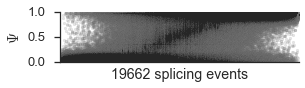

In [6]:
fig, ax = plt.subplots(figsize=(4.5, 1.5))
flotilla.visualize.splicing.lavalamp(se_mxe_singles_min, color='grey', ax=ax, markersize=3)
# fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/lavalamp.png'.format(folder), dpi=600)